# Modules

In [13]:
import pandas as pd
import numpy as np
import csv
import time
import os

from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

## TextBlob Sentiment Analysis

In [6]:
try:
    df = pd.read_csv('/workspaces/Project-Uchumi/data/processed/preprocessed_articles.csv')
except FileNotFoundError:
    df = pd.DataFrame(columns=['url', 'article', 'date'])

# Function to analyze sentiment
def analyze_sentiment(cleaned_article):
    text = cleaned_article
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to each article
df['polarity'], df['subjectivity'] = zip(*df['cleaned_article'].apply(analyze_sentiment))

# Display the results
print(df[['article', 'cleaned_article', 'polarity', 'subjectivity']])

                                              article  \
0   Hopes by Kakamega Deputy Governor Ayub Savula ...   
1   What you need to know:\n- Only a few individua...   
2   What you need to know:\n- According to Makueni...   
3   One of the demonstrators who allegedly entered...   
4   What you need to know:\n- Kasaine was reported...   
5   The National Police Service (NPS) has refuted ...   
6   What you need to know:\n- The groups said if t...   
7   What you need to know:\n- The scheme covers na...   
8   Complexities of Finance Bills have primarily b...   
9   The Finance Bill, 2024 has elicited anger amon...   
10  When the history of the Duruma community is fi...   
11  What you need to know:\n- Widows in Africa cou...   
12  Mr Gachagua, however, says the issues between ...   
13  What you need to know:\n- The Deputy President...   
14  What you need to know:\n- Omtatah argues that ...   
15  What you need to know:\n- Khat is also cultiva...   
16  What you need to know:\n- T

In [7]:
df

,url,article,date,language,cleaned_article,word_vectors,polarity,subjectivity
0,https://nation.africa/kenya/counties/kakamega/...,Hopes by Kakamega Deputy Governor Ayub Savula ...,NaN,en,hope kakamega deputy governor ayub savula two ...,"[array([ 0.034877 , 0.46079 , 0.068392 , -0...",0.012993,0.221474
1,https://nation.africa/kenya/counties/lamu/let-...,What you need to know:\n- Only a few individua...,NaN,en,need know individual institution lamu privileg...,"[array([-0.24834 , 0.90814 , 0.35553 , -0...",0.081405,0.527537
2,https://nation.africa/kenya/counties/makueni/g...,What you need to know:\n- According to Makueni...,NaN,en,need know according makueni finance executive ...,"[array([-0.24834 , 0.90814 , 0.35553 , -0...",-0.009411,0.276143
3,https://nation.africa/kenya/counties/nairobi/a...,One of the demonstrators who allegedly entered...,NaN,en,one demonstrator allegedly entered parliament ...,"[array([-0.22557 , 0.49418 , 0.4861 , -0.43...",0.100000,0.314286
4,https://nation.africa/kenya/counties/nakuru/po...,What you need to know:\n- Kasaine was reported...,NaN,en,need know kasaine reportedly shot dead metre g...,"[array([-0.24834 , 0.90814 , 0.35553 , -0...",-0.114015,0.326515
5,https://nation.africa/kenya/news/-malicious-cl...,The National Police Service (NPS) has refuted ...,NaN,en,national police service np refuted claim seven...,"[array([-3.3138e-03, 3.8946e-01, 2.6350e-01,...",0.063191,0.365424
6,https://nation.africa/kenya/news/action-not-di...,What you need to know:\n- The groups said if t...,NaN,en,need know group said government us decisive ex...,"[array([-0.24834 , 0.90814 , 0.35553 , -0...",-0.025000,0.204167
7,https://nation.africa/kenya/news/civil-servant...,What you need to know:\n- The scheme covers na...,NaN,en,need know scheme cover national government emp...,"[array([-0.24834 , 0.90814 , 0.35553 , -0...",0.073449,0.283983
8,https://nation.africa/kenya/news/education/-st...,Complexities of Finance Bills have primarily b...,NaN,en,complexity finance bill primarily concern olde...,"[array([-0.56268 , 0.29065 , 0.64271 , 1...",0.008461,0.430273
9,https://nation.africa/kenya/news/education/cam...,"The Finance Bill, 2024 has elicited anger amon...",NaN,en,finance bill elicited anger among kenyan thous...,"[array([-0.60946 , -0.21094 , 0.050396 , -0...",0.046253,0.462955


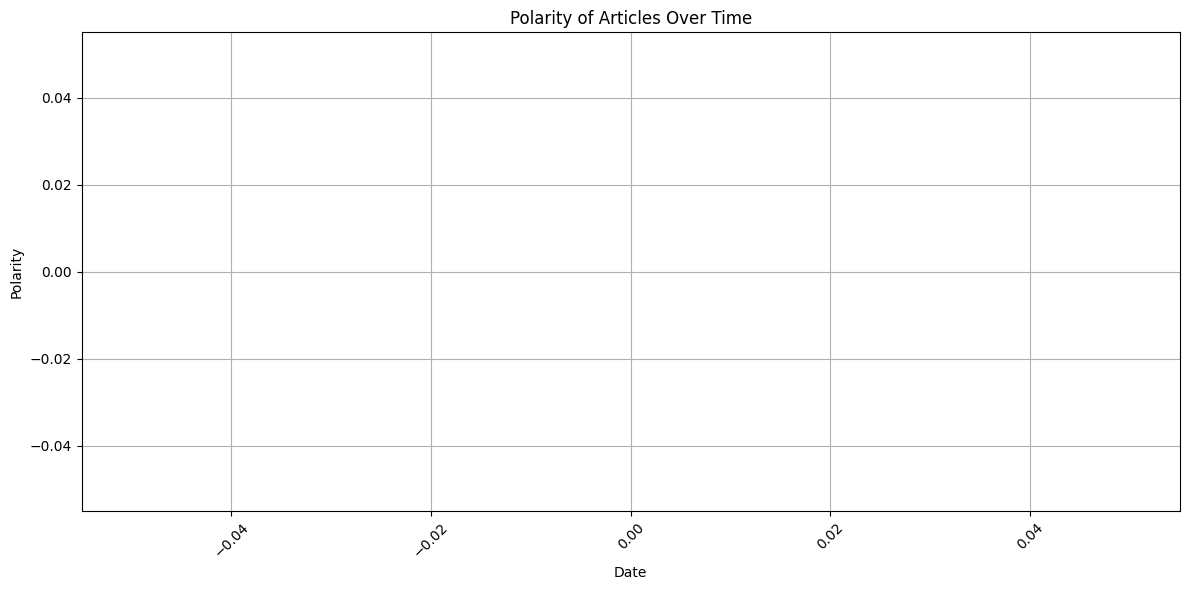

In [8]:
# Assuming 'date' is a column in your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['polarity'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Polarity of Articles Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Keyword Extraction

In [9]:
# Sample data
data = [
    "This is a sample document.",
    "Another example of a document.",
    "And another one for good measure."
]

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the data
tfidf_matrix = tfidf.fit_transform(data)

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

# Find the most important word in each document
for i in range(len(data)):
    doc = tfidf_matrix[i]
    word_idx = doc.indices[doc.data.argmax()]
    keyword = feature_names[word_idx]
    print(f"Keyword in document {i+1}: {keyword}")


Keyword in document 1: this
Keyword in document 2: example
Keyword in document 3: and


In [10]:
# Sample data
data = df['cleaned_article'].tolist()

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the data
tfidf_matrix = tfidf.fit_transform(data)

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()
print(feature_names)

# Find the most important word in each document
keywords = []
for i in range(len(data)):
    doc = tfidf_matrix[i]
    word_idx = doc.indices[doc.data.argmax()]
    keyword = feature_names[word_idx]
    keywords.append(keyword)

# Add the keywords to the dataframe
df['keywords'] = keywords

# Print the keywords for each article
print(df[['cleaned_article', 'keywords']])

['abducted' 'abdulswamad' 'ability' ... 'zambia' 'zanzibar' 'zimbabwe']
                                      cleaned_article        keywords
0   hope kakamega deputy governor ayub savula two ...          savula
1   need know individual institution lamu privileg...          island
2   need know according makueni finance executive ...             tax
3   one demonstrator allegedly entered parliament ...       nyarenchi
4   need know kasaine reportedly shot dead metre g...     not_kasaine
5   national police service np refuted claim seven...           haiti
6   need know group said government us decisive ex...           group
7   need know scheme cover national government emp...            nhif
8   complexity finance bill primarily concern olde...            bill
9   finance bill elicited anger among kenyan thous...         student
10  history duruma community finally written great...  not_university
11  need know widow africa could soon reason smile...       not_widow
12  mr gachagua ho

# Topic Modelling

In [11]:
from gensim import corpora, models
import gensim

# Sample data
data = df['cleaned_article'].tolist()

# Tokenize the data
tokenized_data = [article.split() for article in data]
print(f"tokenized data : {tokenized_data}")

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_data)
print(f"Dictionary : {dictionary}")

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=3, no_above=0.8)
print(f"Filtered dictionary : {dictionary}")

# Convert the documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_data]
print(f"Dictionary.doc2bow([0]): {dictionary.doc2bow(tokenized_data[0])}")
print(f"Corpus : {corpus}")

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             id2word=dictionary,
                                             num_topics=5,
                                             random_state=42,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha='auto',
                                             per_word_topics=True)

# Print the topics
print(len(lda_model.print_topics(-1)))
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

# Assign the topics to the documents
# Extract topics from the LDA model
topic_results = lda_model[corpus]

# Extract the dominant topic for each article
print("Topic 1", topic_results[0][0], max(topic_results[0][0],key=lambda x: x[1]))
print("Topic 2", topic_results[1][0], max(topic_results[1][0],key=lambda x: x[1]))
print("Topic 3", topic_results[2][0], max(topic_results[2][0],key=lambda x: x[1]))
print("Topic 4", topic_results[3][0], max(topic_results[3][0],key=lambda x: x[1]))
print("Topic 5", topic_results[4][0], max(topic_results[4][0],key=lambda x: x[1]))
print([max(topic[0],key=lambda x: x[1]) for topic in topic_results])
dominant_topics = [max(topic[0],key=lambda x: x[1]) for topic in topic_results]

# Add the dominant topics to the dataframe
df['dominant_topic'] = [dictionary.id2token[topic[0]] for topic in dominant_topics]
df['topic_probability'] = [topic[1] for topic in dominant_topics]

# Print the dominant topic and its probability for each article
for index, row in df.iterrows():
    print(f"Article {index + 1} - Dominant Topic: {row['dominant_topic']}, Probability: {row['topic_probability']}")


tokenized data : [['hope', 'kakamega', 'deputy', 'governor', 'ayub', 'savula', 'two', 'wife', 'let', 'hook', 'fraud', 'case', 'dashed', 'court', 'declined', 'director', 'public', 'prosecution', 'dpp', 'plea', 'drop', 'milimani', 'chief', 'magistrate', 'lucas', 'onyina', 'directed', 'case', 'proceed', 'saying', 'dpp', 'overlooked', 'forgery', 'aspect', 'former', 'lugari', 'mp', 'government', 'advertising', 'agency', 'gaa', 'tender', 'involved', 'sh', 'million', 'savula', 'return', 'stand', 'trial', 'director', 'gaa', 'dennis', 'chebitwei', 'walk', 'freedom', 'onyina', 'declined', 'dpps', 'request', 'drop', 'forgery', 'charge', 'savula', 'two', 'wife', 'advertising', 'tender', 'ministry', 'health', 'onyina', 'ordered', 'savula', 'two', 'wife', 'melody', 'gatwiri', 'ringera', 'hellen', 'kepkor', 'kemboi', 'appear', 'september', 'hearing', 'case', 'savula', 'two', 'wife', 'charged', 'alleged', 'intent', 'defraud', 'january', 'accused', 'falsifying', 'document', 'namely', 'ministry', 'healt

# Export Analyzed Data

In [14]:
df.to_csv("/workspaces/Project-Uchumi/data/processed/analyzed_articles.csv", index=False, mode='a', header=not os.path.exists("/workspaces/Project-Uchumi/data/processed/analyzed_articles.csv"))